![Rick and Morty Logo Image](https://i.pinimg.com/originals/e4/26/dd/e426dd8ce20bf848bf974672813a39ac.png)

# Number of Fart Jokes in Rick and Morty

In [2]:
# imports 
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Thanks to A. Hall and D. Lint for making this Website --> please check out their links here:
[Github Link](https://github.com/dorothealint/Rick-and-Morty),
[Rick and Morty Website](http://rickandmorty.newtfire.org/transcripts.html)

In [3]:
# create request object
url = "http://rickandmorty.newtfire.org/transcripts.html"   # url where I found my transcripts 

res = requests.get(url)

In [4]:
# Convert res object into soup
soup = BeautifulSoup(res.text, parser="lxml")

In [5]:
# grab all transcripts
viewer = soup.find("div", class_="transcript-viewer")

In [6]:
num_episodes = 30 # number of episodes to filter through for content
episode_list = []
transcripts = []
fart_jokes = {}

# What is a Fart Joke?
![Fart](https://vignette.wikia.nocookie.net/rickandmorty/images/8/84/Fart.jpg/revision/latest/top-crop/width/360/height/360?cb=20150806021947)

![Mr. PoopyButthole](https://cdn.mos.cms.futurecdn.net/tHH8ZGixEyGiVE8xxgNUgX-1200-80.jpg)

In [15]:
def fart_joke_counter(clean_script): 
    fart_joke_counter = 0
    for item in clean_script:
        if "fart" in item or "butt" in item or "poop" in item or "shit" in item:     # question about defining what is a fart joke
            fart_joke_counter += 1
    return fart_joke_counter

# Scrape the website and organize the scripts into a single file

In [16]:
for ep in range(num_episodes+1):
    episode = viewer.find("div", class_="main", id=f"aboutopt{ep}")
    title = episode.find("h2").text
    episode_list.append(title)
    
    stage_items = []
    stage = episode.find_all("span", class_="stage")
    for item in stage:
        stage_items.append(item.text)
    
    raw_script = episode.find_all("p", class_="sp")
    clean_script = []
    for item in raw_script:
        speaker = item.find("span", class_="speaker").text
        speech = item.find("span", class_="speech").text
        clean_text = speaker + ": " + speech
        clean_script.append(clean_text)
    
    num_fart_jokes = fart_joke_counter(clean_script) + fart_joke_counter(stage_items)
    fart_jokes.update({title:num_fart_jokes})
    

# Interpret the Results

In [17]:
total_fart_jokes = sum(fart_jokes.values())

In [18]:
avg_fart_jokes_per_episode = total_fart_jokes / num_episodes

In [19]:
avg_fart_jokes_per_episode

7.666666666666667

In [20]:
total_fart_jokes

230

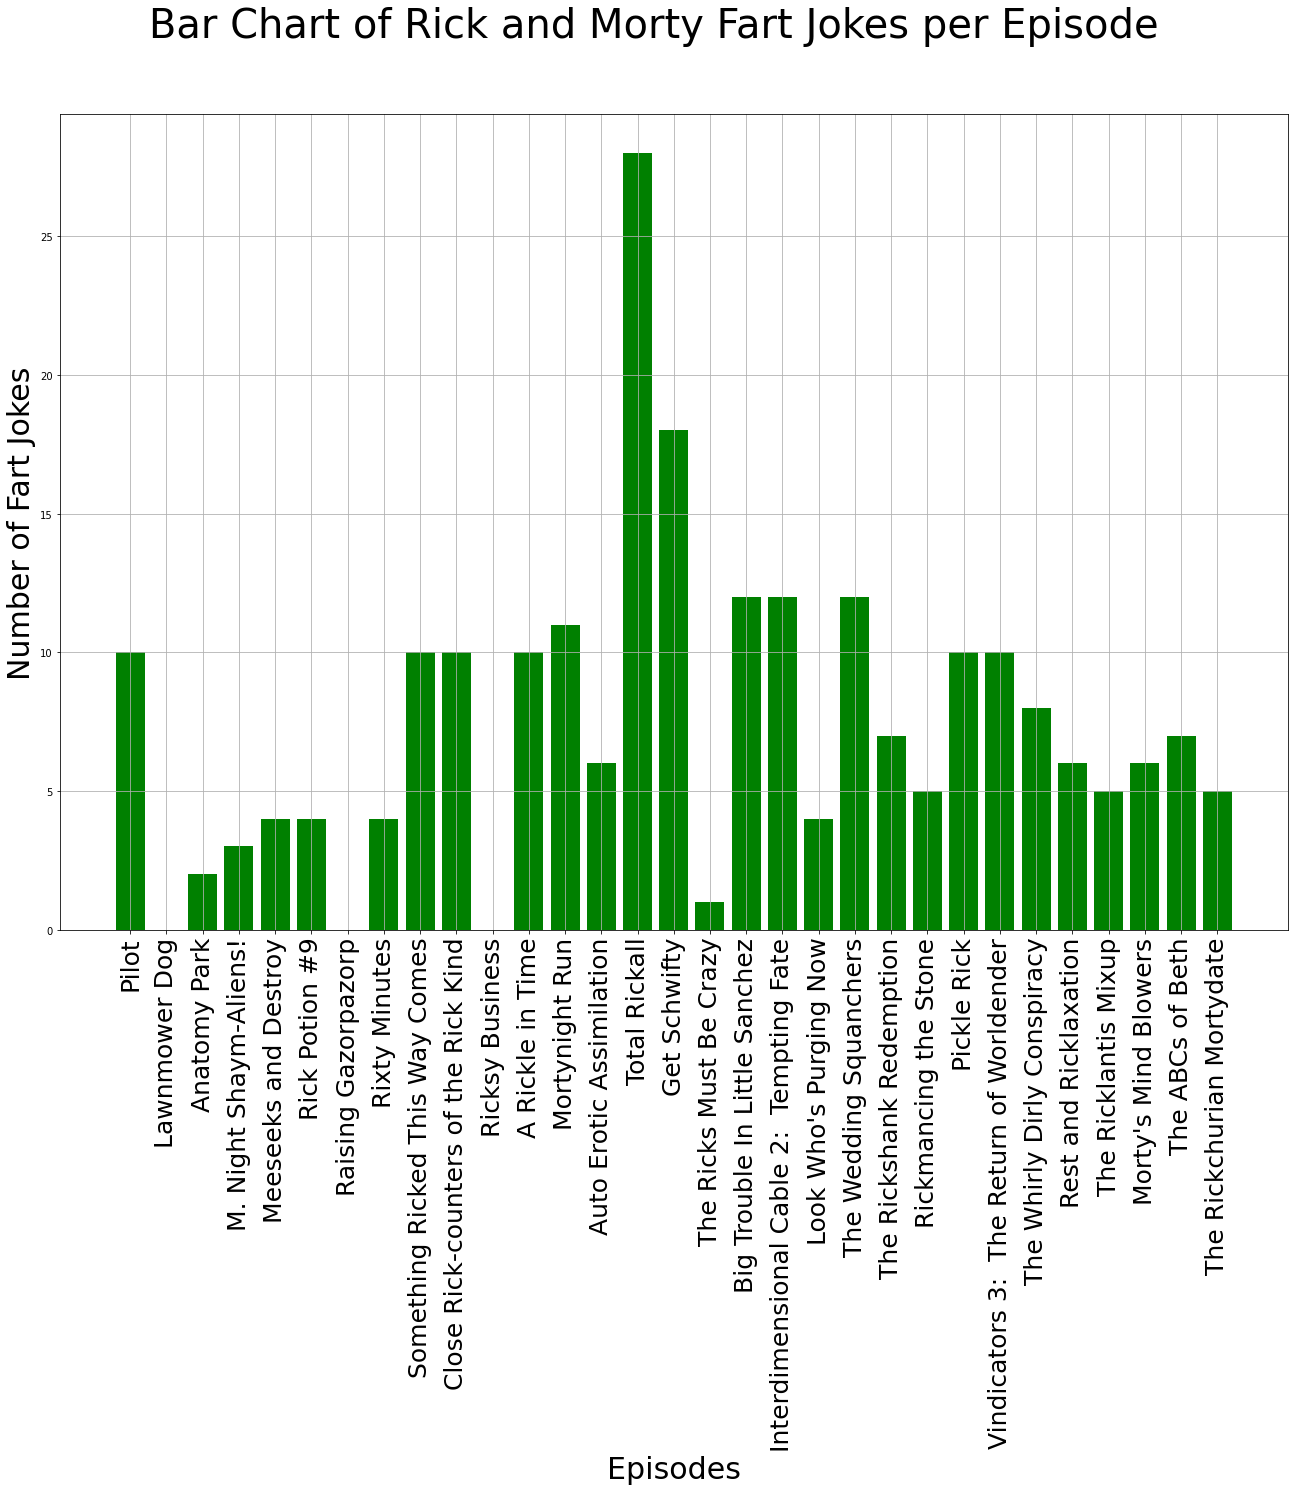

In [21]:
fig = plt.figure(figsize=(22, 15))
fig.suptitle("Bar Chart of Rick and Morty Fart Jokes per Episode", fontsize=40);
ax = fig.add_subplot(111)

ax.bar(range(len(fart_jokes)), list(fart_jokes.values()), align="center", color="g")
ax.set_xlabel("Episodes", fontsize=30)
ax.set_ylabel("Number of Fart Jokes", fontsize=30)
plt.grid(True)
plt.xticks(range(len(fart_jokes)), list(fart_jokes.keys()), rotation=90, fontsize=25);

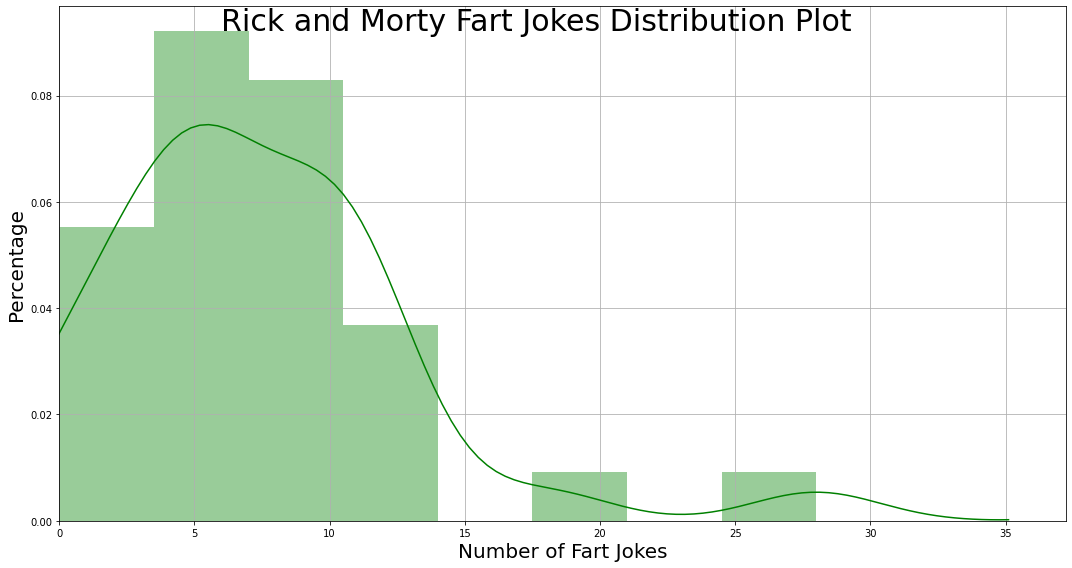

In [22]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

fig.suptitle("Rick and Morty Fart Jokes Distribution Plot", fontsize=30)
ax.set_xlabel("Number of Fart Jokes", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
sns.distplot(list(fart_jokes.values()), color="g");
plt.xlim(0)
plt.grid(True);
plt.tight_layout();

![The Shit Issue](https://media1.giphy.com/media/3Fdskc7J0timI/giphy.gif)

## When is shit a Fart Joke and when is it not?

![100 Years Rick and Morty](https://66.media.tumblr.com/ced7fb3c0772d1f8f240906988f46198/tumblr_nt3wavYW491ts2zapo1_400.gifv)